# Mushroom Classification

This data set is from the UCI Machine Learning repository, and is used to determine whether a mushroom is edible or poisonous based on physical characteristics. Below I've used a decision tree model to classify a given mushroom.

https://archive.ics.uci.edu/ml/datasets/mushroom

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing
Below I use regular expressions to grab feature names directly from the datasets' description. After all the data is fed into a dataframe it is then one-hot encoded to provide easier processing.

In [2]:
class_desc = """1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d"""

In [3]:
import re

pattern = r"\d+\.\s(\S+):"
headers = ['class'] + re.findall(pattern, class_desc)
headers_to_str = ",".join(headers)

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
df.columns = headers
df.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [5]:
# Encoding labels: poisonous = 0, edible = 1

labels_str = df['class']
labels_str.head()

labels = labels_str.replace({"p" : 0, "e" : 1})
labels.head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [6]:
# Removing the lables
df = df.drop('class', axis = 1)

In [7]:
# OneHot Encoding
df_encoded = pd.get_dummies(df)
df_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Training

In [8]:
# Splitting the data into training and testing arrays
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded, 
                                                    labels, 
                                                    test_size = 0.4, 
                                                    random_state = 11)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4873 samples.
Testing set has 3250 samples.


In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
# Predict and measure accuracy
from sklearn.metrics import fbeta_score, accuracy_score

predictions = model.predict(X_test)
results     = accuracy_score(y_test, predictions)

print(f"Overall {results*100:.2f}% prediction accuracy out of {X_test.shape[0]} cases")

Overall 99.94% prediction accuracy out of 3250 cases


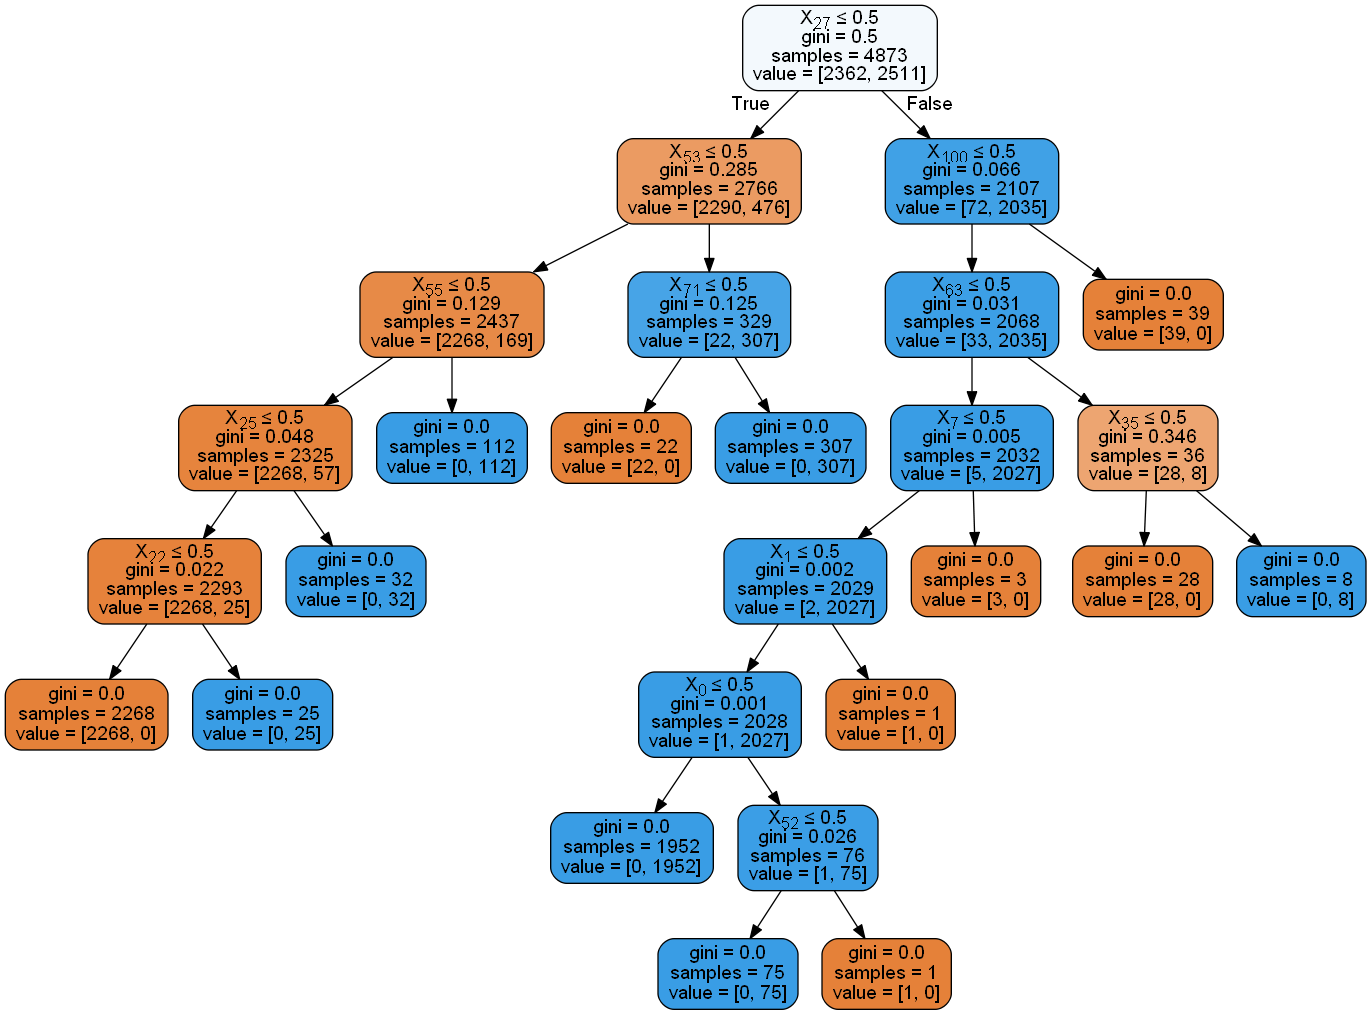

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Implementation
For using the model we first generate a test case using randomly chosen characteristics, and then feed it to a function that hold the filters it through our model

In [94]:
def get_test_mushroom(df):
    return [ np.random.choice(df[header].unique()) for header in df.columns ]

def is_edible(df, df_encoded, mushroom, model):
    tmp_array = np.zeros((1, len(df_encoded.columns)))
    tmp_frame = pd.DataFrame(tmp_array, columns=df_encoded.columns)
    for column, char in zip(df.columns, mushroom):
        encoded_column = "{}_{}".format(column, char)
        tmp_frame.at[0, encoded_column] = 1

    edible = model.predict(tmp_frame)[0]
    if edible:
        return 'edible'
    else:
        return 'poisonous'

In [95]:
sample_mushrooms = [ get_test_mushroom(df) for i in range(10) ]

for num, mushroom in enumerate(sample_mushrooms):
    prediction = is_edible(df, df_encoded, mushroom, model)
    print(f"Sample mushroom #{num+1} is {prediction}!")

Sample mushroom #1 is edible!
Sample mushroom #2 is edible!
Sample mushroom #3 is poisonous!
Sample mushroom #4 is poisonous!
Sample mushroom #5 is edible!
Sample mushroom #6 is poisonous!
Sample mushroom #7 is edible!
Sample mushroom #8 is edible!
Sample mushroom #9 is edible!
Sample mushroom #10 is edible!
